In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
df = pd.read_csv(r"C:\Users\user\Desktop\subjects\DEEP DATA WORK\data\climate_change_dataset.csv")



In [11]:
df.info()
print(df.columns)
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year                         1000 non-null   int64  
 1   Country                      1000 non-null   object 
 2   Avg Temperature (°C)         1000 non-null   float64
 3   CO2 Emissions (Tons/Capita)  1000 non-null   float64
 4   Sea Level Rise (mm)          1000 non-null   float64
 5   Rainfall (mm)                1000 non-null   int64  
 6   Population                   1000 non-null   int64  
 7   Renewable Energy (%)         1000 non-null   float64
 8   Extreme Weather Events       1000 non-null   int64  
 9   Forest Area (%)              1000 non-null   float64
dtypes: float64(5), int64(4), object(1)
memory usage: 78.3+ KB
Index(['Year', 'Country', 'Avg Temperature (°C)',
       'CO2 Emissions (Tons/Capita)', 'Sea Level Rise (mm)', 'Rainfall (mm)',
       

Year                           0
Country                        0
Avg Temperature (°C)           0
CO2 Emissions (Tons/Capita)    0
Sea Level Rise (mm)            0
Rainfall (mm)                  0
Population                     0
Renewable Energy (%)           0
Extreme Weather Events         0
Forest Area (%)                0
dtype: int64

In [15]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")


# check for the categorical column distribution
df['Country'].value_counts().head(10)

# Top countries
print("\n----- Top 10 Countries by Count -----")
print(df['Country'].value_counts().head(10))


# Check extreme values (possible outliers)
print(df[['Avg Temperature (°C)', 'CO2 Emissions (Tons/Capita)', 'Sea Level Rise (mm)']].describe())


Number of duplicate rows: 0

----- Top 10 Countries by Count -----
Country
Indonesia       75
Russia          74
USA             73
South Africa    73
India           70
Argentina       67
China           67
Brazil          67
Canada          67
France          66
Name: count, dtype: int64
       Avg Temperature (°C)  CO2 Emissions (Tons/Capita)  Sea Level Rise (mm)
count           1000.000000                  1000.000000          1000.000000
mean              19.883100                    10.425800             3.009600
std                8.542897                     5.614665             1.146081
min                5.000000                     0.500000             1.000000
25%               12.175000                     5.575000             2.000000
50%               20.100000                    10.700000             3.000000
75%               27.225000                    15.400000             4.000000
max               34.900000                    20.000000             5.000000


In [17]:
# Example: Rainfall from mm to cm
df['Rainfall (cm)'] = df['Rainfall (mm)'] / 10


In [19]:
numeric_cols = ['Avg Temperature (°C)', 'CO2 Emissions (Tons/Capita)', 'Sea Level Rise (mm)']
print("\n----- Numeric Column Summary for Outlier Check -----")
print(df[numeric_cols].describe())


numeric_cols = [
    'Avg Temperature (°C)',
    'CO2 Emissions (Tons/Capita)',
    'Sea Level Rise (mm)',
    'Rainfall (mm)',
    'Population',
    'Renewable Energy (%)',
    'Extreme Weather Events',
    'Forest Area (%)'
]

print("\n----- Numeric Column Summary for Outlier Check -----")
print(df[numeric_cols].describe())





----- Numeric Column Summary for Outlier Check -----
       Avg Temperature (°C)  CO2 Emissions (Tons/Capita)  Sea Level Rise (mm)
count           1000.000000                  1000.000000          1000.000000
mean              19.883100                    10.425800             3.009600
std                8.542897                     5.614665             1.146081
min                5.000000                     0.500000             1.000000
25%               12.175000                     5.575000             2.000000
50%               20.100000                    10.700000             3.000000
75%               27.225000                    15.400000             4.000000
max               34.900000                    20.000000             5.000000

----- Numeric Column Summary for Outlier Check -----
       Avg Temperature (°C)  CO2 Emissions (Tons/Capita)  Sea Level Rise (mm)  \
count           1000.000000                  1000.000000          1000.000000   
mean              19.883100 

In [21]:
# Select numeric columns except the grouping column
numeric_cols = df.select_dtypes(include='number').columns.drop(['Year'])

# Average metrics per year
yearly_data = df.groupby('Year')[numeric_cols].mean().reset_index()

# For country, exclude 'Country' from numeric columns (it's string anyway)
numeric_cols_country = df.select_dtypes(include='number').columns  # all numeric
country_data = df.groupby('Country')[numeric_cols_country].mean().reset_index()

# Check results
print(yearly_data.head())
print(country_data.head())


   Year  Avg Temperature (°C)  CO2 Emissions (Tons/Capita)  \
0  2000             20.501887                    11.224528   
1  2001             20.117073                     9.929268   
2  2002             21.433333                     9.933333   
3  2003             18.219512                    11.085366   
4  2004             18.804000                    10.000000   

   Sea Level Rise (mm)  Rainfall (mm)    Population  Renewable Energy (%)  \
0             2.939623    1687.735849  6.246580e+08             27.566038   
1             3.273171    1756.902439  6.629403e+08             25.658537   
2             2.952941    1928.745098  5.781645e+08             25.860784   
3             2.934146    1826.707317  6.698096e+08             26.587805   
4             2.790000    1713.920000  6.925443e+08             29.470000   

   Extreme Weather Events  Forest Area (%)  Rainfall (cm)  
0                7.830189        41.890566     168.773585  
1                7.682927        42.217073  

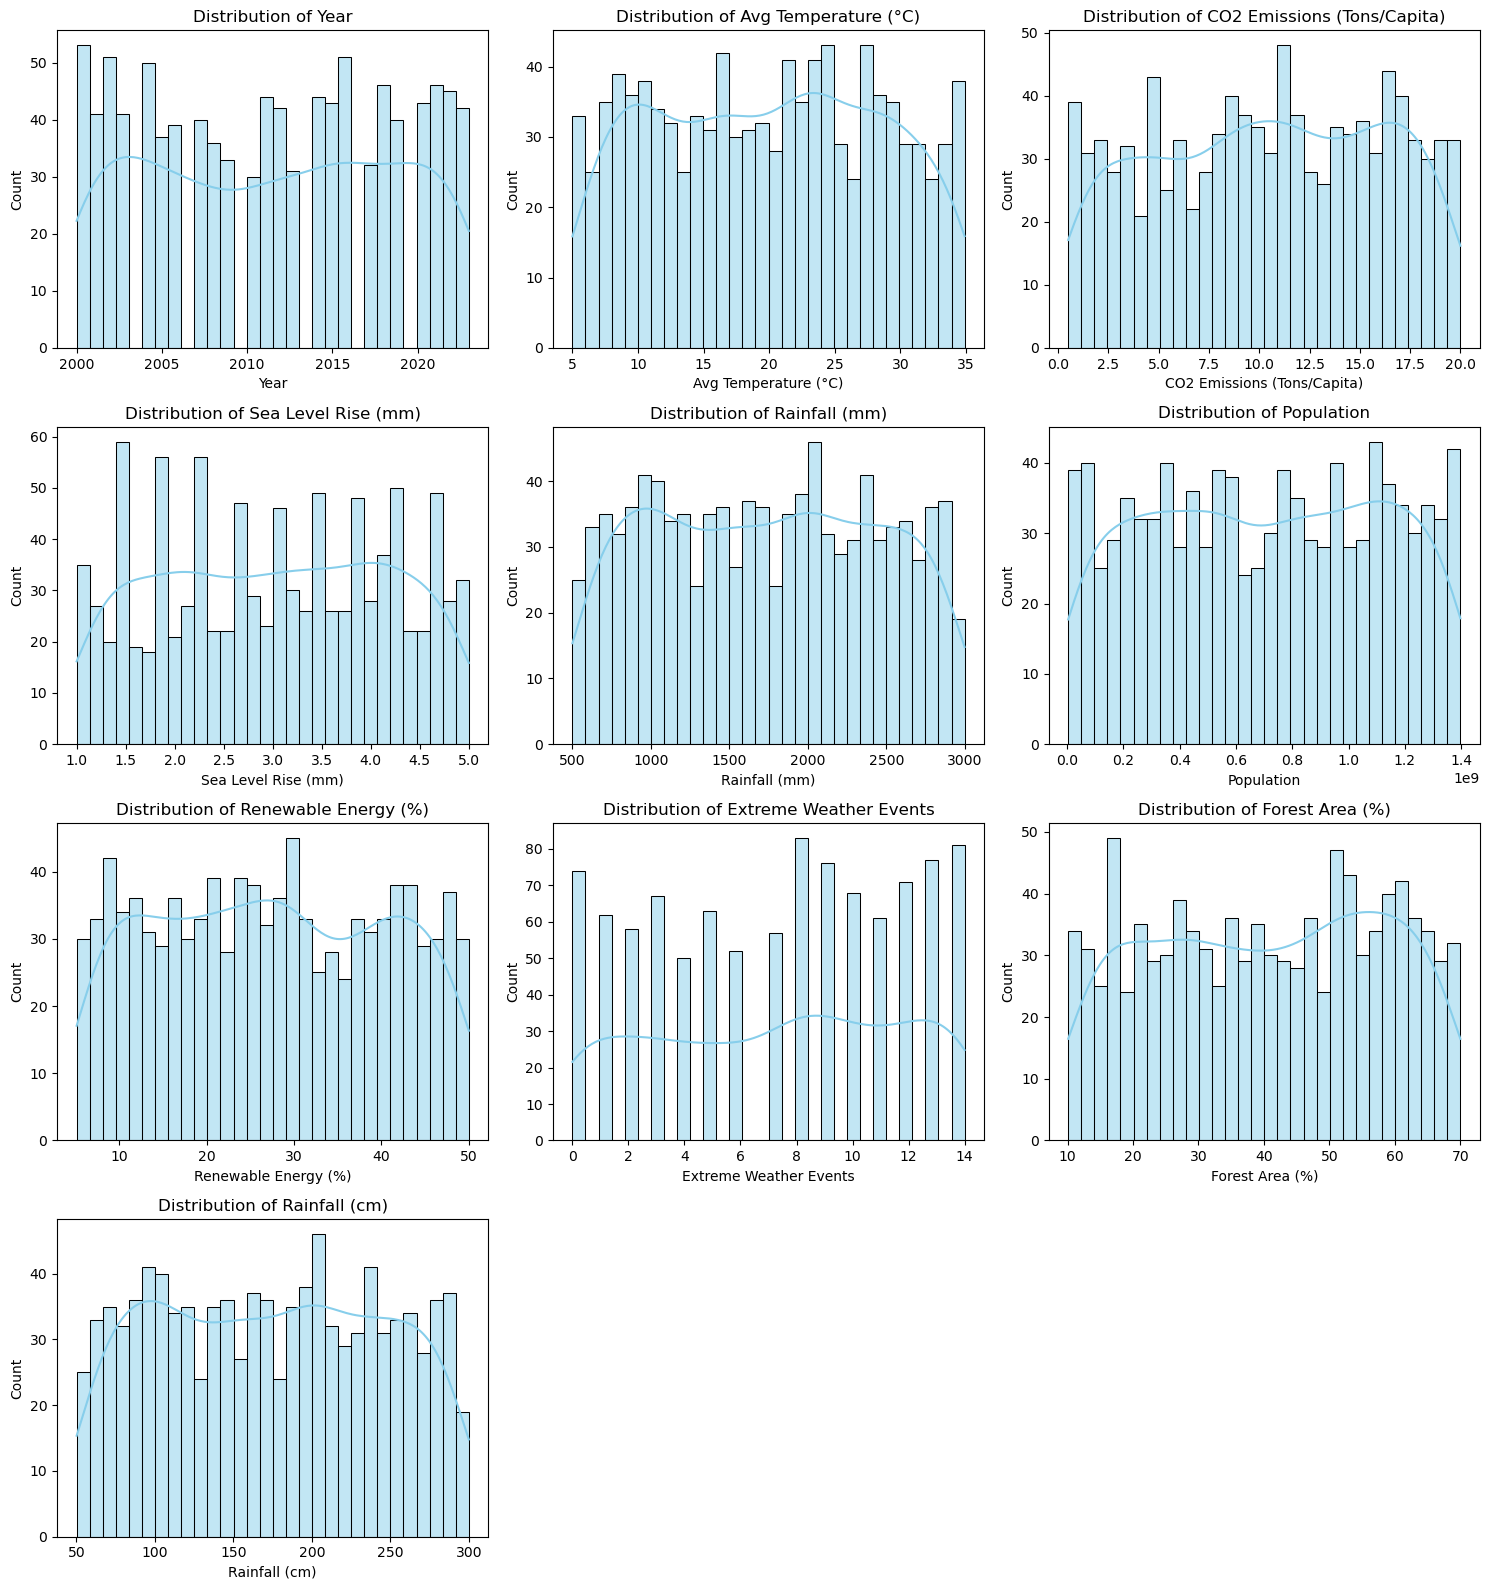

In [23]:

numeric_cols = df.select_dtypes(include='number').columns

# Calculate rows and columns for subplot grid automatically
import math
n_cols = 3  # number of columns per figure
n_rows = math.ceil(len(numeric_cols) / n_cols)

plt.figure(figsize=(5 * n_cols, 4 * n_rows))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


In [24]:

# Function to flag outliers
def flag_outliers(series, n_std=3):
    mean = series.mean()
    std = series.std()
    upper = mean + n_std * std
    lower = mean - n_std * std
    return series.apply(lambda x: x < lower or x > upper)

# Apply for numeric columns
numeric_cols = ['Avg Temperature (°C)', 'CO2 Emissions (Tons/Capita)',
                'Sea Level Rise (mm)', 'Rainfall (mm)', 'Population',
                'Renewable Energy (%)', 'Extreme Weather Events', 'Forest Area (%)']

outlier_flags = {col: flag_outliers(df[col]) for col in numeric_cols}

# Example: Count of outliers per column
for col, flag in outlier_flags.items():
    print(f"{col}: {flag.sum()} outliers")


Avg Temperature (°C): 0 outliers
CO2 Emissions (Tons/Capita): 0 outliers
Sea Level Rise (mm): 0 outliers
Rainfall (mm): 0 outliers
Population: 0 outliers
Renewable Energy (%): 0 outliers
Extreme Weather Events: 0 outliers
Forest Area (%): 0 outliers


In [27]:
# Scale population
df['Population (Millions)'] = df['Population'] / 1_000_000

# Rename columns (optional)
df.rename(columns={
    'Avg Temperature (°C)': 'Avg_Temp_C',
    'CO2 Emissions (Tons/Capita)': 'CO2_Tons_per_Capita',
    'Sea Level Rise (mm)': 'Sea_Level_mm',
    'Renewable Energy (%)': 'Renewable_Energy_pct',
    'Forest Area (%)': 'Forest_Area_pct'
}, inplace=True)

# Drop old Population column if desired
# df.drop(columns=['Population'], inplace=True)


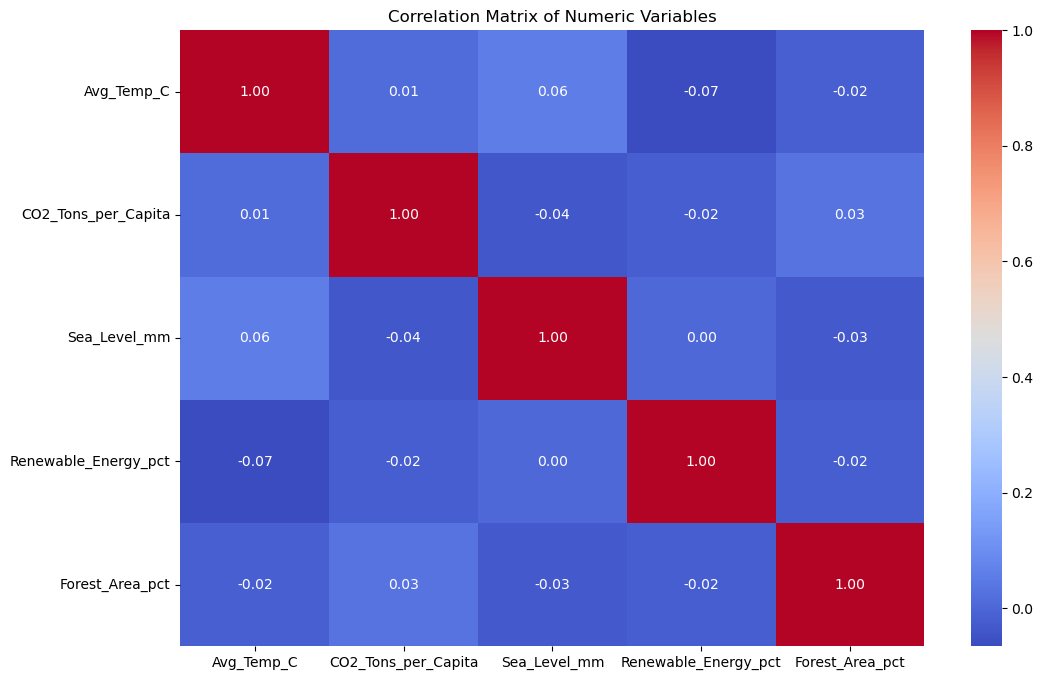

In [29]:
# Correlation Matrix

numeric_cols = ['Avg_Temp_C', 'CO2_Tons_per_Capita', 'Sea_Level_mm', 
                'Renewable_Energy_pct', 'Forest_Area_pct']

plt.figure(figsize=(12, 8))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Numeric Variables")
plt.show()


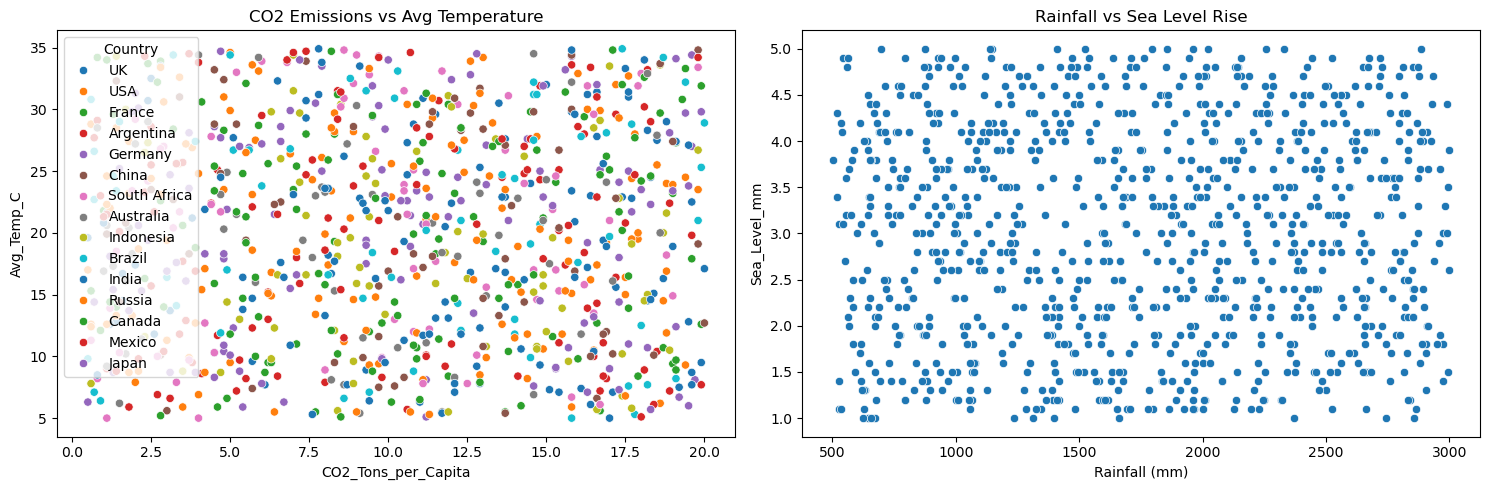

In [31]:
# Scatter Plots for Relationships

plt.figure(figsize=(15, 5))

# CO2 vs Temperature
plt.subplot(1, 2, 1)
sns.scatterplot(x='CO2_Tons_per_Capita', 
                y='Avg_Temp_C', 
                data=df,
                hue='Country', 
                palette='tab10')
plt.title('CO2 Emissions vs Avg Temperature')

# Rainfall vs Sea Level
plt.subplot(1, 2, 2)
sns.scatterplot(x='Rainfall (mm)', 
                y='Sea_Level_mm', 
                data=df)
plt.title('Rainfall vs Sea Level Rise')

plt.tight_layout()
plt.show()

In [3]:
numeric_cols = [
    'Avg Temperature (°C)',
    'CO2 Emissions (Tons/Capita)',
    'Sea Level Rise (mm)',
    'Rainfall (mm)',
    'Population',
    'Renewable Energy (%)',
    'Extreme Weather Events',
    'Forest Area (%)'
]

# Group by Year and calculate mean
yearly_data = df.groupby('Year')[numeric_cols].mean().reset_index()

plt.figure(figsize=(15, 8))
sns.lineplot(x='Year', y='Avg Temperature (°C)', data=yearly_data, marker='o', label='Avg Temperature (°C)')
sns.lineplot(x='Year', y='CO2 Emissions (Tons/Capita)', data=yearly_data, marker='o', label='CO2 Emissions')
sns.lineplot(x='Year', y='Sea Level Rise (mm)', data=yearly_data, marker='o', label='Sea Level Rise')
plt.title("Trend of Climate Variables Over Years")
plt.ylabel("Values")
plt.legend()
plt.show()


NameError: name 'df' is not defined

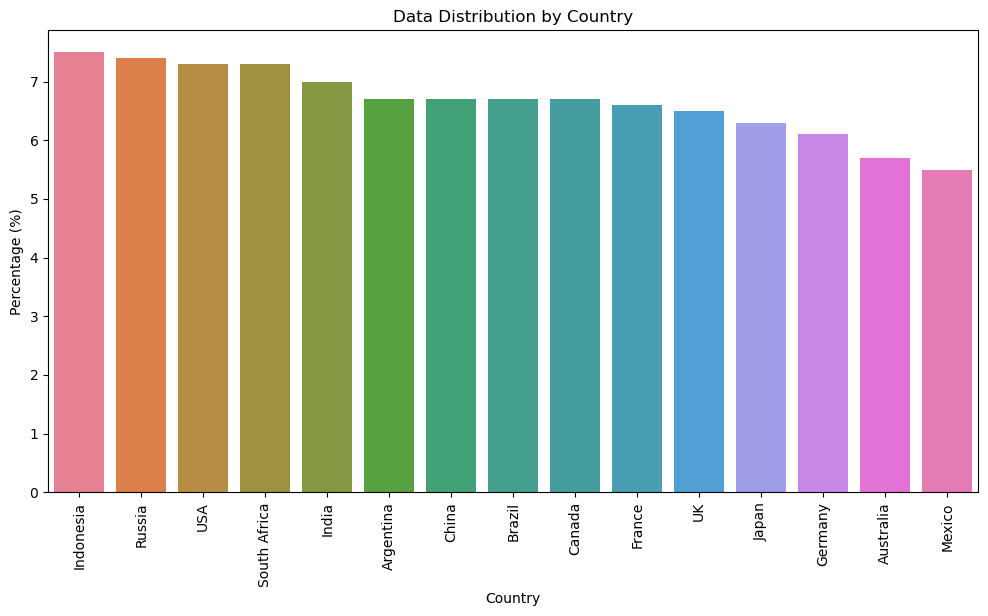

In [229]:
# Categorical Distribution Check (Countries / Regions)

# Proportion of data per country
country_counts = df['Country'].value_counts(normalize=True) * 100

plt.figure(figsize=(12, 6))

# Updated Seaborn barplot to avoid FutureWarning
sns.barplot(x=country_counts.index, 
            y=country_counts.values, 
            hue=country_counts.index, 
            dodge=False, 
            legend=False)

plt.ylabel('Percentage (%)')
plt.title('Data Distribution by Country')
plt.xticks(rotation=90)  # Rotate country labels if many
plt.show()


In [ ]:
# --------questions from here .---------

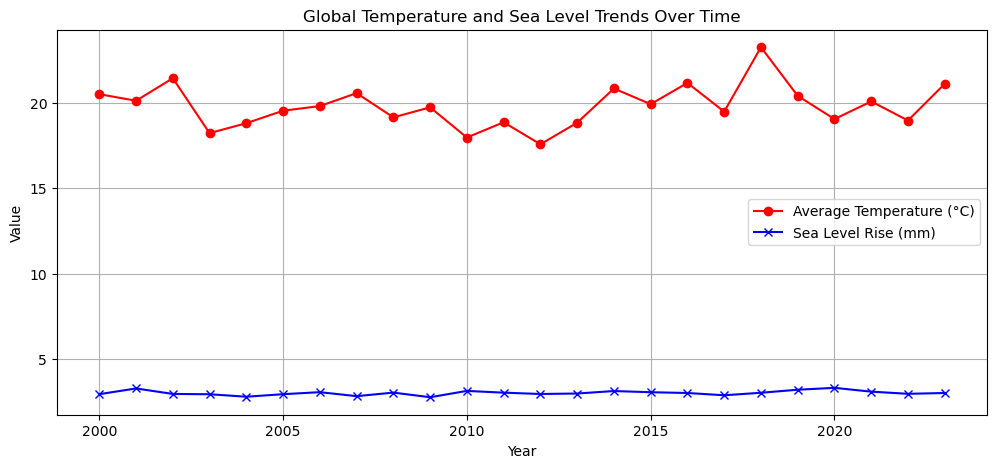

In [231]:
# Question 1: Global Warming Trajectory .

# 1. Global Warming Trajectory
plt.figure(figsize=(12, 5))
plt.plot(yearly_data['Year'], yearly_data['Avg Temperature (°C)'], 
         label='Average Temperature (°C)', marker='o', color='red')
plt.plot(yearly_data['Year'], yearly_data['Sea Level Rise (mm)'], 
         label='Sea Level Rise (mm)', marker='x', color='blue')
plt.title('Global Temperature and Sea Level Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.savefig('1_Global_Warming_Trajectory.png')
plt.show()


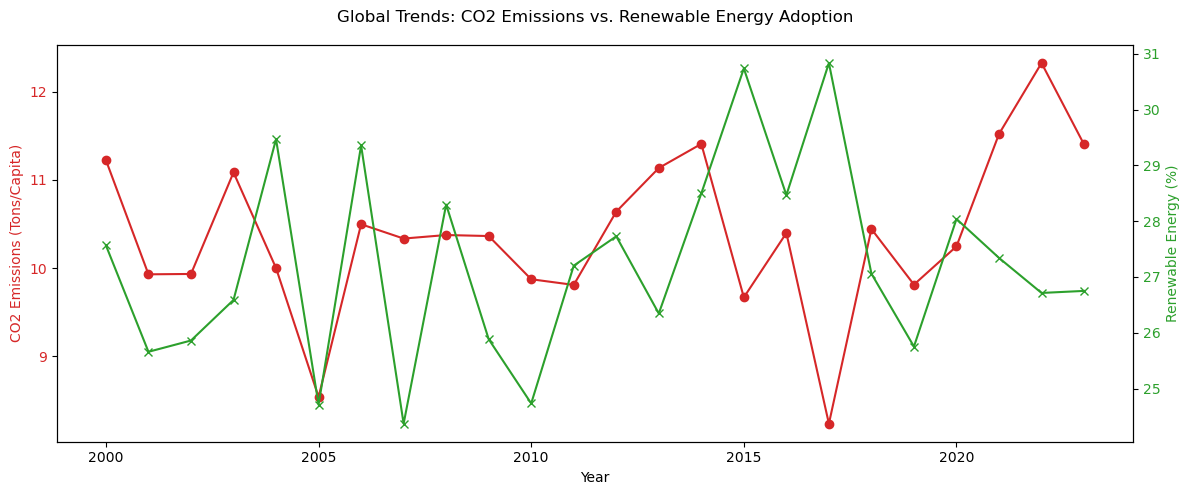

In [233]:
#  Question 2: Mitigation Progress

# 2. Mitigation Progress (Dual-Axis Plot)
fig, ax1 = plt.subplots(figsize=(12, 5))

# Plot 1: CO2 Emissions
color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('CO2 Emissions (Tons/Capita)', color=color)
ax1.plot(yearly_data['Year'], yearly_data['CO2 Emissions (Tons/Capita)'], 
         color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)

# Plot 2: Renewable Energy (Second Axis)
ax2 = ax1.twinx()  
color = 'tab:green'
ax2.set_ylabel('Renewable Energy (%)', color=color)
ax2.plot(yearly_data['Year'], yearly_data['Renewable Energy (%)'], 
         color=color, marker='x')
ax2.tick_params(axis='y', labelcolor=color)

fig.suptitle('Global Trends: CO2 Emissions vs. Renewable Energy Adoption')
fig.tight_layout()
plt.savefig('2_Mitigation_Progress_Trends.png')
plt.show()


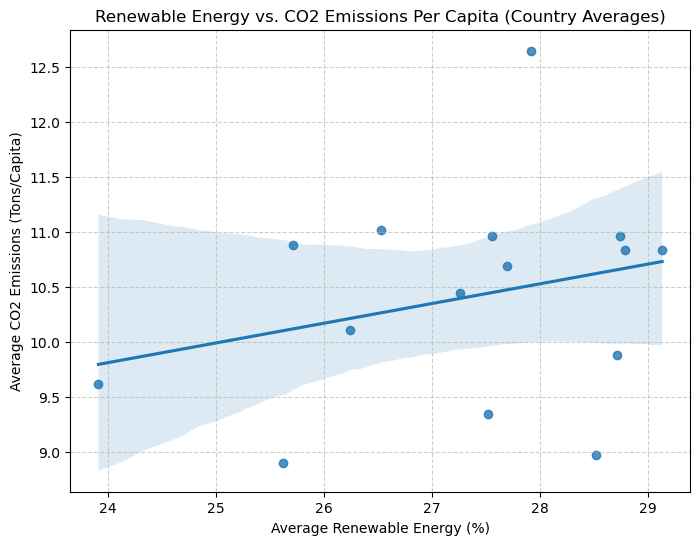

In [235]:
# Question 3: The Emitter-Adopter Link

# 3. Emitter-Adopter Link (Bivariate Regression Plot)
plt.figure(figsize=(8, 6))
sns.regplot(
    x='Renewable Energy (%)', 
    y='CO2 Emissions (Tons/Capita)', 
    data=country_data
)
plt.title('Renewable Energy vs. CO2 Emissions Per Capita (Country Averages)')
plt.xlabel('Average Renewable Energy (%)')
plt.ylabel('Average CO2 Emissions (Tons/Capita)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('3_Emissions_vs_Renewables_Scatter.png')
plt.show()


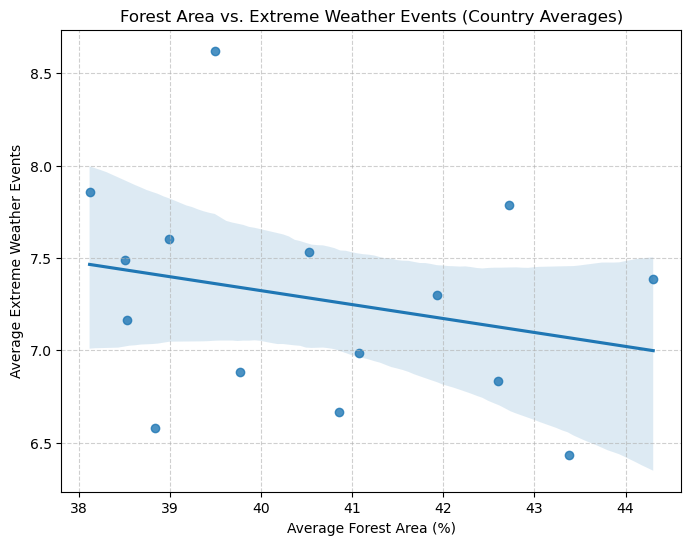

In [237]:
#  Question 4: Ecosystem Resilience

# 4. Ecosystem Resilience (Bivariate Regression Plot)
plt.figure(figsize=(8, 6))
sns.regplot(
    x='Forest Area (%)', 
    y='Extreme Weather Events', 
    data=country_data
)
plt.title('Forest Area vs. Extreme Weather Events (Country Averages)')
plt.xlabel('Average Forest Area (%)')
plt.ylabel('Average Extreme Weather Events')
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('4_Forest_vs_Extreme_Events_Scatter.png')
plt.show()


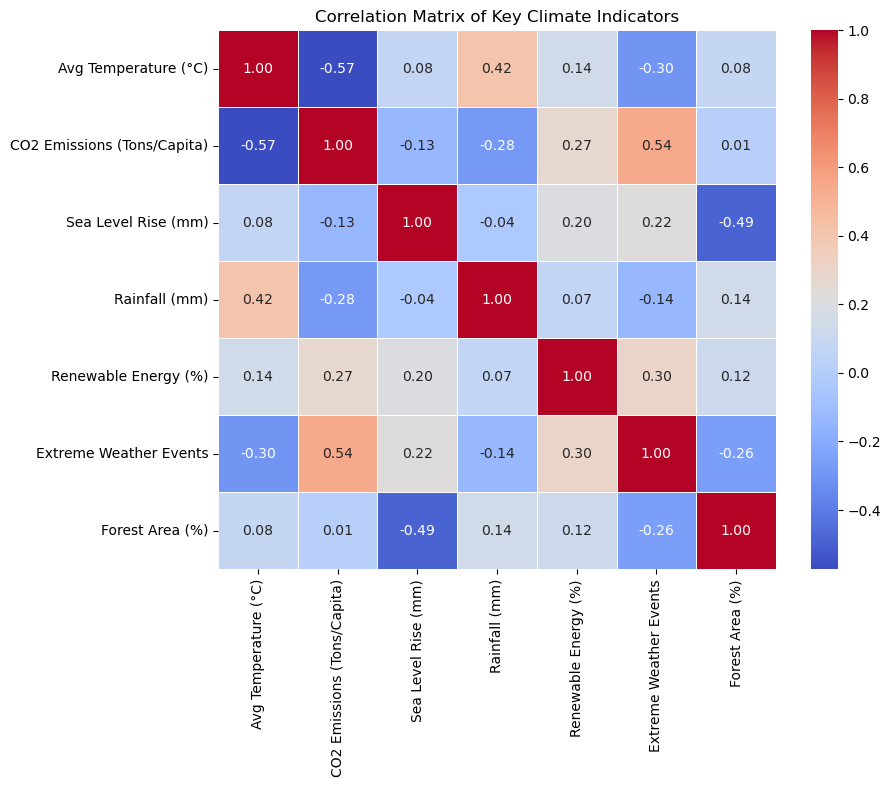

In [239]:
# Question 5: Overall Risk Factors

# 5. Overall Risk Factors (Correlation Heatmap)
# Calculate the correlation matrix
# Question 5: Overall Risk Factors

# 5. Overall Risk Factors (Correlation Heatmap)
cols = ['Avg Temperature (°C)', 'CO2 Emissions (Tons/Capita)', 
        'Sea Level Rise (mm)', 'Rainfall (mm)', 
        'Renewable Energy (%)', 'Extreme Weather Events', 
        'Forest Area (%)']

# Calculate the correlation matrix
correlation_matrix = country_data[cols].corr()

plt.figure(figsize=(9, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Key Climate Indicators')
plt.savefig('5_Correlation_Heatmap.png')
plt.show()



C:\Users\user\AppData\Local\Temp\ipykernel_12592\1697198780.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


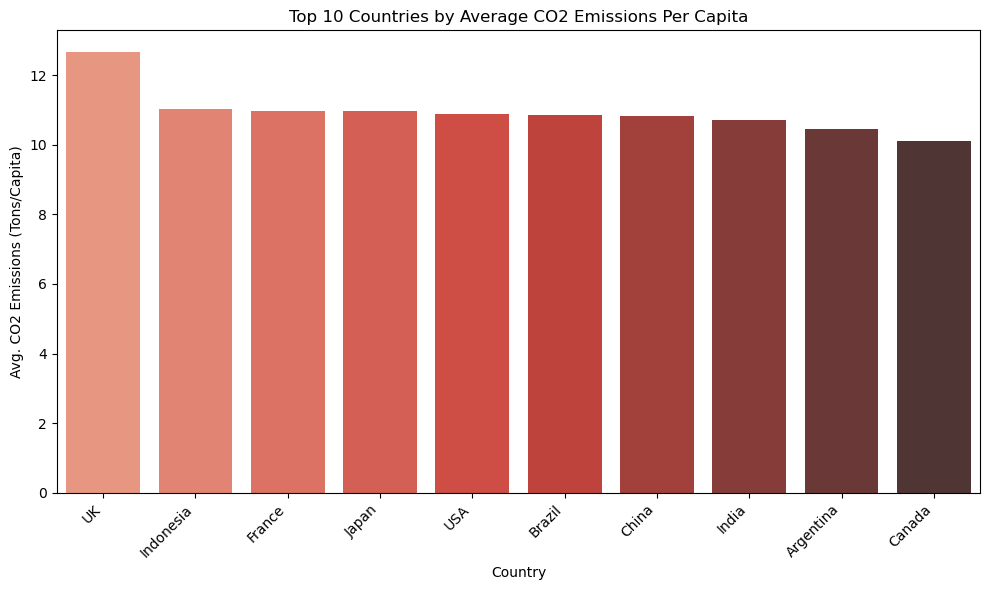

In [241]:
# Question 6: Top Polluters

# 6. Top Polluters (Bar Plot)
top_polluters = country_data.sort_values(by='CO2 Emissions (Tons/Capita)', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(
    x='Country', 
    y='CO2 Emissions (Tons/Capita)', 
    data=top_polluters, 
    palette='Reds_d',
    hue=None,      # explicitly set hue to None
    dodge=False,   # ensure bars are not dodged
)
plt.title('Top 10 Countries by Average CO2 Emissions Per Capita')
plt.xlabel('Country')
plt.ylabel('Avg. CO2 Emissions (Tons/Capita)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('6_Top_Polluters.png')
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_12592\2013911987.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country', y='Renewable Energy (%)', data=renewable_leaders, palette='Greens_d')


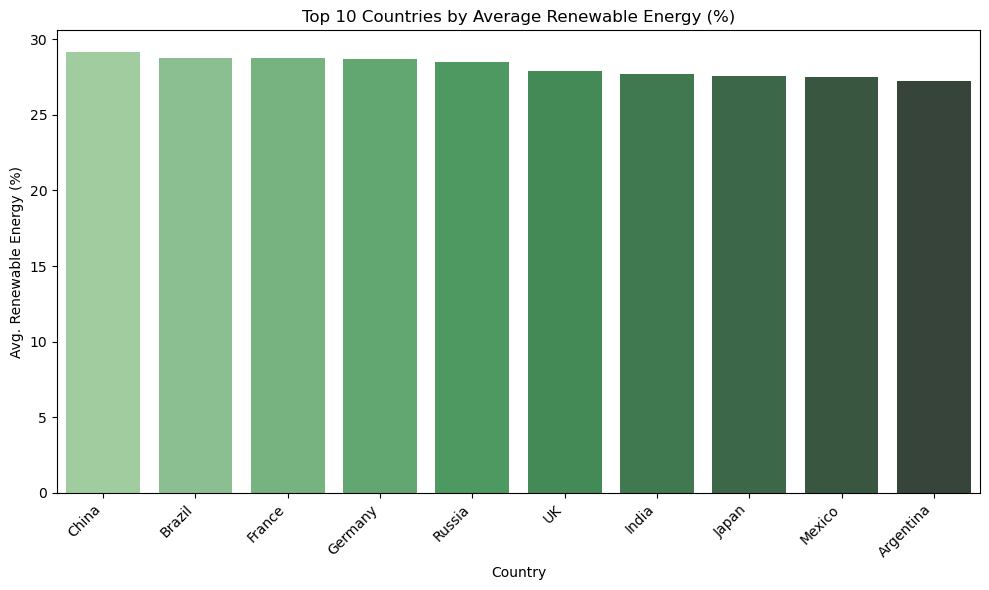

In [243]:
# Question 7: Renewable Leaders 

# 7. Renewable Leaders (Bar Plot)
renewable_leaders = country_data.sort_values(by='Renewable Energy (%)', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='Renewable Energy (%)', data=renewable_leaders, palette='Greens_d')
plt.title('Top 10 Countries by Average Renewable Energy (%)')
plt.xlabel('Country')
plt.ylabel('Avg. Renewable Energy (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('7_Renewable_Leaders.png')
plt.show()


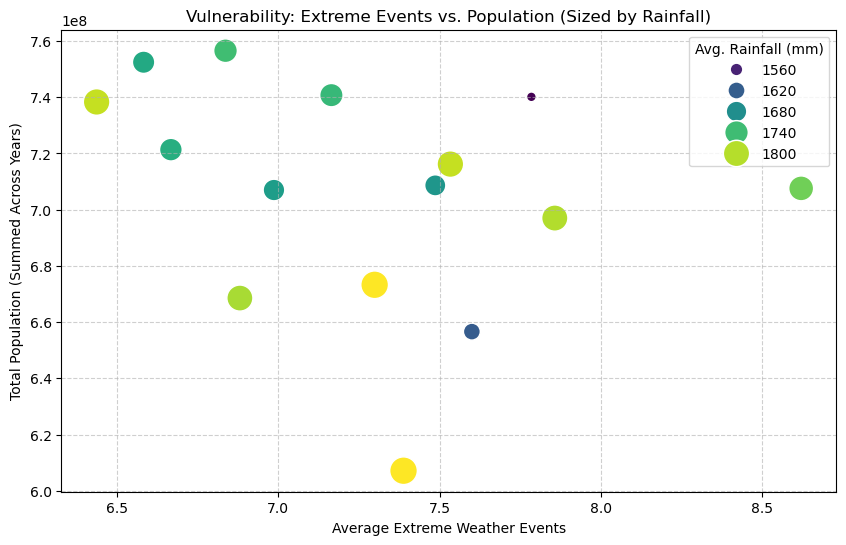

In [245]:
# Question 8: Vulnerability

# 8. Vulnerability Analysis (Multivariate Scatter Plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Extreme Weather Events', 
    y='Population', 
    size='Rainfall (mm)', 
    data=country_data, 
    hue='Rainfall (mm)', 
    sizes=(50, 400), 
    palette='viridis'
)
plt.title('Vulnerability: Extreme Events vs. Population (Sized by Rainfall)')
plt.xlabel('Average Extreme Weather Events')
plt.ylabel('Total Population (Summed Across Years)')
plt.legend(title='Avg. Rainfall (mm)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('8_Vulnerability_Scatter.png')
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_12592\3535208567.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


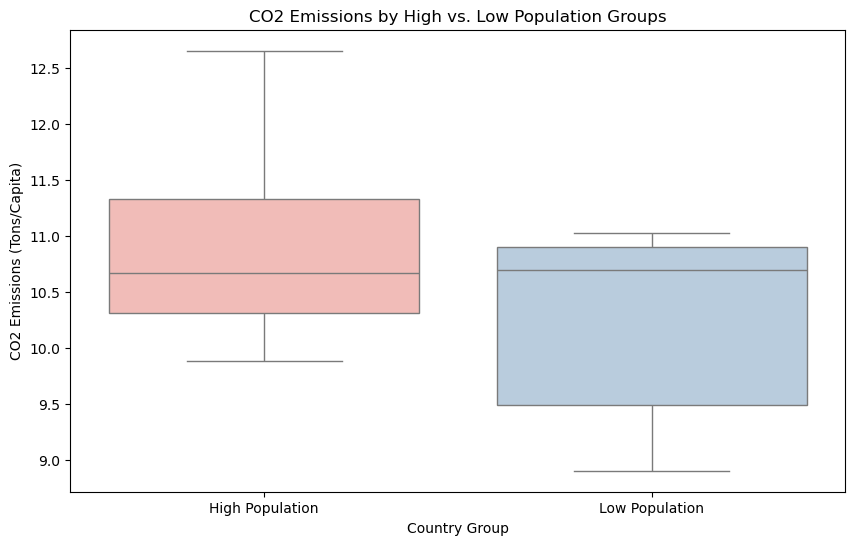

In [247]:
# Question 9: The Wealth Disparity Angle

# Define a high population threshold (e.g., top 25% of the total population sum)
pop_threshold = country_data['Population'].quantile(0.75)
country_data['Pop_Group'] = np.where(country_data['Population'] >= pop_threshold, 
                                     'High Population', 'Low Population')

plt.figure(figsize=(10, 6))
sns.boxplot(
    x='Pop_Group', 
    y='CO2 Emissions (Tons/Capita)', 
    data=country_data, 
    palette='Pastel1'
)
plt.title('CO2 Emissions by High vs. Low Population Groups')
plt.xlabel('Country Group')
plt.ylabel('CO2 Emissions (Tons/Capita)')
plt.savefig('9_Emissions_by_Pop_Group.png')
plt.show()


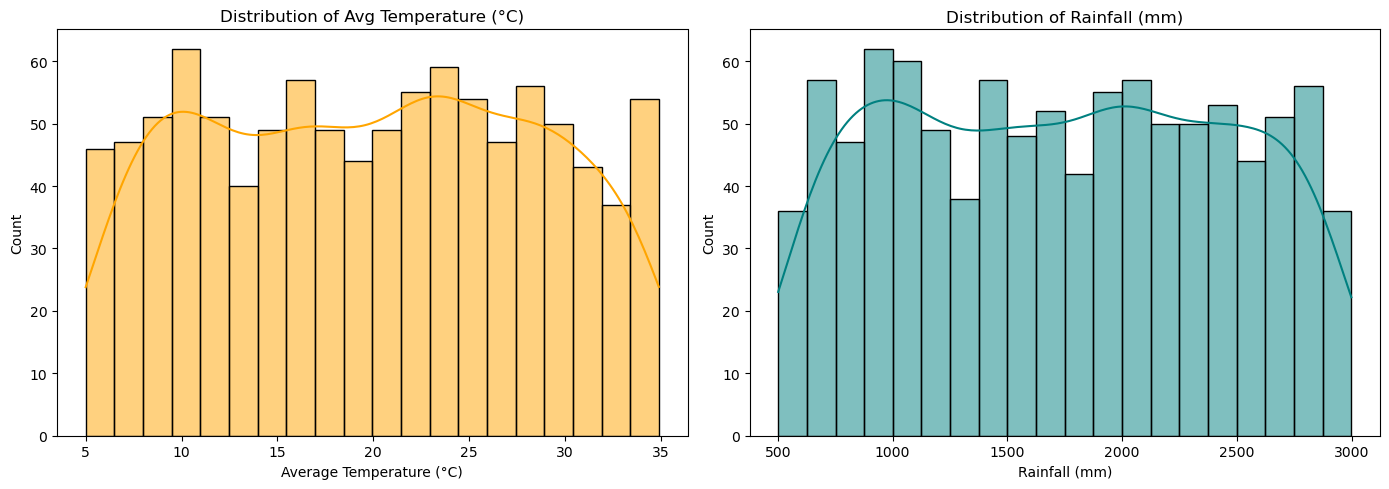

In [251]:
# Question 10: Temperature & Rainfall Distribution

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram 1: Temperature
sns.histplot(df['Avg_Temp_C'], bins=20, kde=True, ax=axes[0], color='orange')
axes[0].set_title('Distribution of Avg Temperature (°C)')
axes[0].set_xlabel('Average Temperature (°C)')
axes[0].set_ylabel('Count')

# Histogram 2: Rainfall
sns.histplot(df['Rainfall (mm)'], bins=20, kde=True, ax=axes[1], color='teal')
axes[1].set_title('Distribution of Rainfall (mm)')
axes[1].set_xlabel('Rainfall (mm)')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.savefig('10_Temp_Rainfall_Distributions.png')
plt.show()



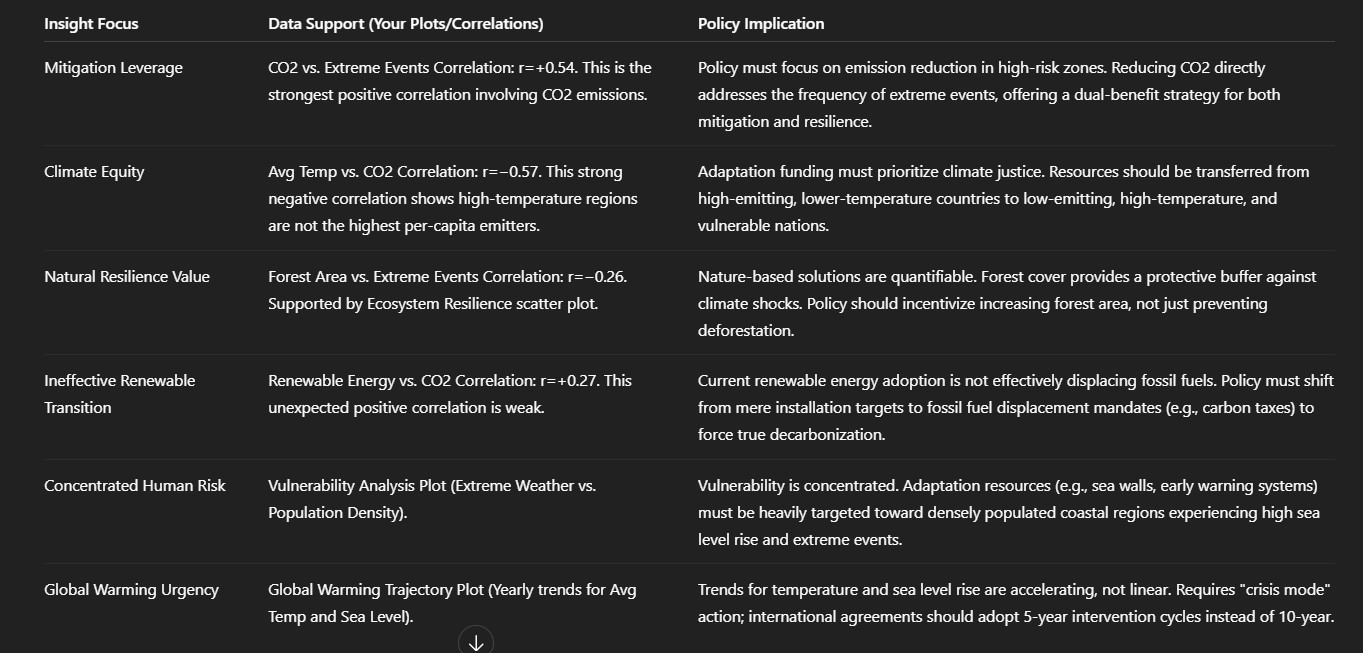

In [171]:
# 4. Insight Generation: 5 Key Findings Linked to Policy

from IPython.display import Image, display
display(Image(filename=r"C:\Users\user\Desktop\insight.jpg"))




In [ ]:
# 5. Policy Recommendations for the UN Environmental Programme

Proposal 1: The 'Emissions Displacement Mandate' (Addresses Insight 1 & 2)
Action: Impose a Global Carbon Efficiency Tax on the Top 10 Polluting Countries (from your Q6 Bar Plot). This tax is triggered only if their increase in Renewable Energy (%) over a 5-year period fails to reduce their CO2 Emissions (Tons/Capita).

Rationale: Uses the weak correlation (r=+0.27) to force renewables to actively displace, rather than simply add to, the energy supply, directly addressing the concentrated risk (r=+0.54).



Proposal 2: The 'Resilience for Conservation' Fund (Addresses Insight 3)
Action: Create a dedicated Natural Capital Resilience Fund where access to adaptation aid is strictly conditioned on a nation’s commitment to increasing its Forest Area (%) by a minimum of 1% per year.

Rationale: Levers the measurable negative correlation (r=−0.26) to ensure resilience funding delivers dual benefits: ecosystem health and protection from extreme weather events.


    
Proposal 3: The Global Climate Equity Transfer (Addresses Insight 4 & 5)
Action: Establish a Vulnerability and Equity Fund that mandates the largest funding contributions come from countries with high CO 
2
​
  emissions but moderate temperatures (the r=−0.57 group) and directs them to the regions identified as having the highest intersection of Extreme Events and Population Density.

Rationale: Provides data-driven climate justice, ensuring that adaptation efforts are geographically focused on the most vulnerable human populations using the money from the largest historical/current polluters.